In [2]:
import ROOT
import warnings
warnings.filterwarnings('ignore')

Welcome to JupyROOT 6.16/00


Chi2/ndf: 100.155965074
1.10811163108e-167

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      801.248
NDf                       =            8
Edm                       =  1.75791e-07
NCalls                    =           83
p0                        =      644.645   +/-   9.9198      
p1                        =   0.00469359   +/-   8.08956e-05 
p2                        =      1.01858   +/-   2.90707e-05 


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


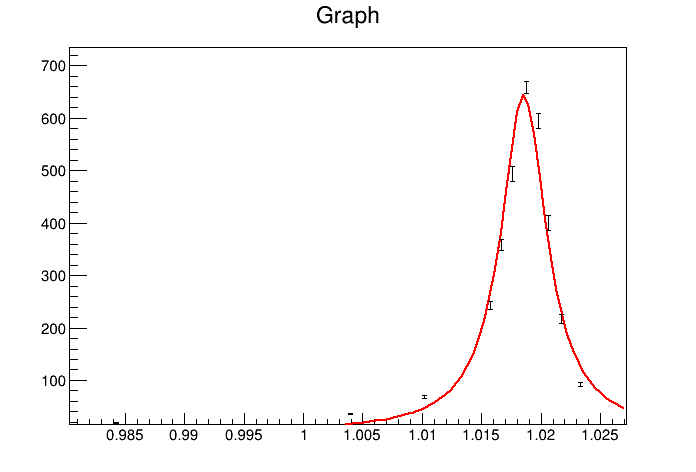

In [22]:
import ROOT

def func( xx , pp ):
    A = pp[0]
    G = pp[1]
    M = pp[2]
    E = xx[0]
    return A*((G*1.0/2)**2)/(((E-M)**2)+((G*1.0/2)**2))

f = ROOT.TF1( "func", func, 0.5, 1, 3)

A0=680
M0=1.02
G0=0.005

gr = ROOT.TGraphErrors( "variant1.txt" )
f.SetParameter(0, A0)
f.SetParameter(1, G0)
f.SetParameter(2, M0)

r = gr.Fit( f, "SQ" )
r.Print()

print "Chi2/ndf:", r.Chi2()/r.Ndf()
print ROOT.TMath.Prob(r.Chi2(), r.Ndf())

c1 = ROOT.TCanvas( 'c1', 'c1', 200, 10, 700, 500 )
gr.Draw("AP")
c1.Update()

c1.Draw()

In [5]:
c = r.GetCorrelationMatrix()

In [14]:
type(c)
for i in range(3):
    print ''
    for j in range(3):
        print c(i, j),


1.0 -0.797984935516 0.198748466764 
-0.797984935516 1.0 -0.277373396278 
0.198748466764 -0.277373396278 1.0


Warning in <TROOT::Append>: Replacing existing TH1: A4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: G4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: M4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Graph (Potential memory leak).
Warning in <T

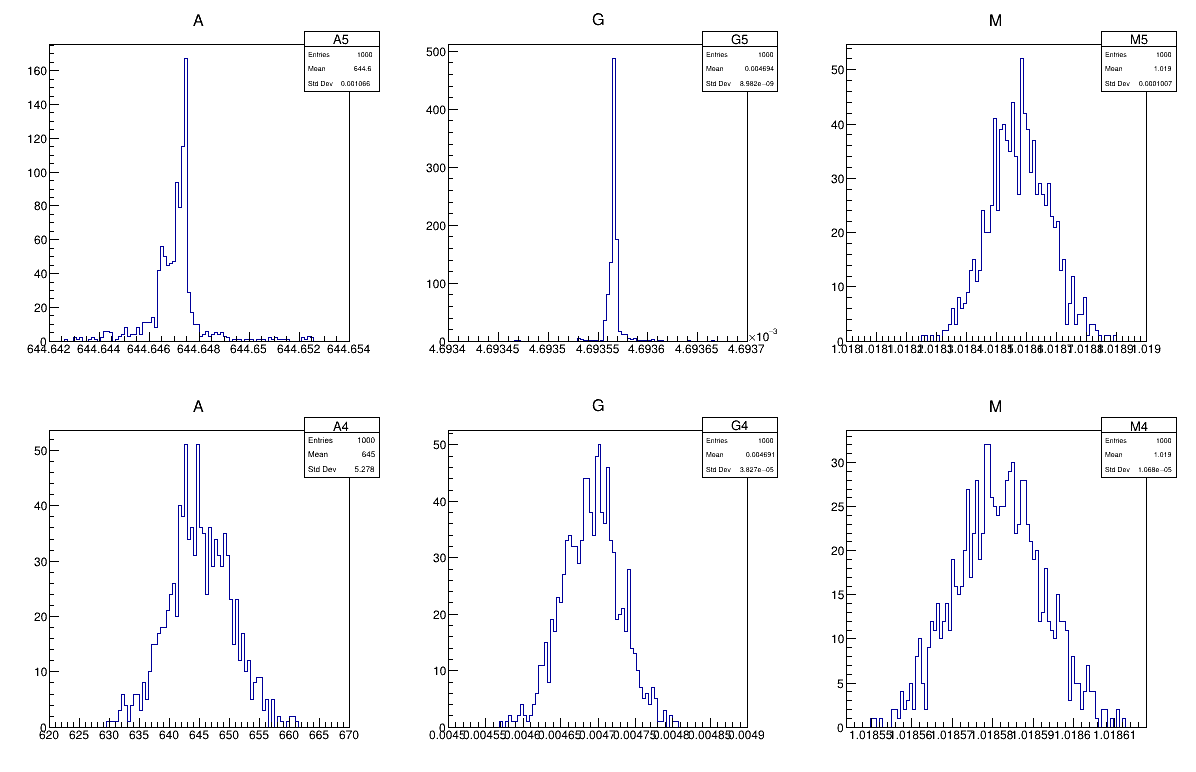

In [16]:
hAV = ROOT.TH1F("A4","A", 100, 620, 670)
hGV = ROOT.TH1F("G4","G", 100, 0.0045, 0.0049)
hMV = ROOT.TH1F("M4","M", 100, 0., 0.)

de = 0.01
E0 = 1.02

for i in range(1000):
    gr1=ROOT.TGraphErrors(gr)
    for j in range(gr.GetN()):
        r=ROOT.gRandom.Gaus(0, gr.GetY()[j]*de*gr.GetX()[j]/E0) 
        gr1.SetPoint(j, gr.GetX()[j], gr.GetY()[j]+r)
    r=gr1.Fit(f,"SQ")
    r1=r.Value(0)
    r2=r.Value(1)
    r3=r.Value(2)
    hAV.Fill(r1)
    hGV.Fill(r2)
    hMV.Fill(r3)
    
dE = 0.0001

hAH = ROOT.TH1F("A5","A", 100, 644.642, 644.654)
hGH = ROOT.TH1F("G5","G", 100, 0.0046934, 0.0046937)
hMH = ROOT.TH1F("M5","M", 100, 1.018, 1.019)
    
for i in range(1000):
    gr1=ROOT.TGraphErrors(gr)
    r=ROOT.gRandom.Gaus(0 , dE) 
    for j in range(gr.GetN()):
        gr1.SetPoint(j, gr.GetX()[j]+r, gr.GetY()[j])
    r=gr1.Fit(f,"SQ")
    r1=r.Value(0)
    r2=r.Value(1)
    r3=r.Value(2)
    hAH.Fill(r1)
    hGH.Fill(r2)
    hMH.Fill(r3)

c2 = ROOT.TCanvas( 'c2', 'c22', 400, 200, 1200, 800 )
c2.Divide(3, 2)
c2.cd(1)
hAH.Draw()
c2.cd(2)
hGH.Draw()
c2.cd(3)
hMH.Draw()
c2.cd(4)
hAV.Draw()
c2.cd(5)
hGV.Draw()
c2.cd(6)
hMV.Draw()

c2.Update()

c2.Draw()

In [17]:
A = 644.7
G = 0.004694
M = 1.019

In [18]:
d1 = (0.01/1.02)*A/2
d2 = (0.01/1.02)*A
d3 = (0.01/1.02)*A/2

In [19]:
dM=G*G/64/A/A*(d1**2+d3**2)
dM**(1.0/2)

4.067597096678498e-06

In [20]:
dG=G*G/A/A*(d1**2+d2**2+d3**2)
dG**(1.0/2)

5.636227868933451e-05

In [21]:
dA=(d1**2+d2**2)
dA**(1.0/2)

7.066632475951542